In [1]:
from fredapi import Fred
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from functools import reduce
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Get FRED Data

In [2]:
# Key: 02d60bd3174b5444867a02671ae80475
api_key = input("Please input your FRED API Key:\n").strip()
fred = Fred(api_key=api_key)

Please input your FRED API Key:
02d60bd3174b5444867a02671ae80475


# US Data
- US Recession Index (FRED)
- US GDP (FRED)
- US GDP Percent Change (Calculated)
- U.S. Unemployment Rate (FRED)
- U.S. Unemployment Rate % Change (Calculated)
- SP500 (Yahoo Finance)
- NASDAQ100 (FRED)
- Treasury Yield Curve (FRED)

In [3]:
def get_fred_series(name: str, date: str, label: str, to_frame: bool = True, pct_change: bool = False, periods: int = None, freq=None):
    """ Gets the FRED Series in Name, from Date, and inputs the data into a label 
        Assumes that data is in format of: "date", "value"
    """
    series = fred.get_series(name)
    if to_frame:
        series = series.to_frame()
    if pct_change:
        if not freq and not periods:
            series = series.pct_change()
        elif freq:
            series = series.pct_change(freq=freq)
        elif periods:
            series = series.pct_change(periods=periods)
    series = series.loc[date:]
    series[label] = series[0]
    return series.drop(columns = 0)

In [4]:
us_rec = get_fred_series('JHDUSRGDPBR', '1970-01-01', 'is_recession')
us_rec

,is_recession
1970-01-01,1.0
1970-04-01,1.0
1970-07-01,1.0
1970-10-01,1.0
1971-01-01,0.0
...,...
2020-04-01,1.0
2020-07-01,0.0
2020-10-01,0.0
2021-01-01,0.0


In [5]:
us_gdp = get_fred_series('GDP', '1970-01-01', 'US_GDP')
us_gdp['US_GDP']*1000000000

1970-01-01    1.051200e+12
1970-04-01    1.067375e+12
1970-07-01    1.086059e+12
1970-10-01    1.088608e+12
1971-01-01    1.135156e+12
                  ...     
2020-07-01    2.113857e+13
2020-10-01    2.147760e+13
2021-01-01    2.203823e+13
2021-04-01    2.274096e+13
2021-07-01    2.318704e+13
Name: US_GDP, Length: 207, dtype: float64

In [6]:
us_gdp_pctcg = get_fred_series('GDP', '1970-01-01', 'US_GDP_%Change', pct_change=True)
us_gdp_pctcg

,US_GDP_%Change
1970-01-01,0.012573
1970-04-01,0.015387
1970-07-01,0.017505
1970-10-01,0.002347
1971-01-01,0.042759
...,...
2020-07-01,0.085285
2020-10-01,0.016038
2021-01-01,0.026103
2021-04-01,0.031887


In [7]:
unemp = fred.get_series('UNRATE').loc['1970-01-01':].to_frame()
unemp['US Unemp'] = unemp[0]
unemp = unemp.drop(columns = 0)
unemp

,US Unemp
1970-01-01,3.9
1970-02-01,4.2
1970-03-01,4.4
1970-04-01,4.6
1970-05-01,4.8
...,...
2021-07-01,5.4
2021-08-01,5.2
2021-09-01,4.8
2021-10-01,4.6


In [8]:
unemp = get_fred_series('UNRATE', '1970-01-01', 'US Unemp')
unemp

,US Unemp
1970-01-01,3.9
1970-02-01,4.2
1970-03-01,4.4
1970-04-01,4.6
1970-05-01,4.8
...,...
2021-07-01,5.4
2021-08-01,5.2
2021-09-01,4.8
2021-10-01,4.6


In [9]:
unemp_pct = get_fred_series('UNRATE', '1970-01-01', 'US Unemp % Change', pct_change=True)
unemp_pct

,US Unemp % Change
1970-01-01,0.114286
1970-02-01,0.076923
1970-03-01,0.047619
1970-04-01,0.045455
1970-05-01,0.043478
...,...
2021-07-01,-0.084746
2021-08-01,-0.037037
2021-09-01,-0.076923
2021-10-01,-0.041667


In [10]:
nascom = get_fred_series('NASDAQCOM', '1970-01-01', 'NASDAQCOM')
nascom

,NASDAQCOM
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-11-26,15491.66
2021-11-29,15782.83
2021-11-30,15537.69
2021-12-01,15254.05


In [11]:
nascom = nascom.resample('M').mean()
nascom.index = nascom.index + pd.Timedelta('1 day')
nascom

,NASDAQCOM
1971-03-01,100.963333
1971-04-01,104.470435
1971-05-01,109.555238
1971-06-01,109.570500
1971-07-01,108.567727
...,...
2021-09-01,14856.517727
2021-10-01,15023.538571
2021-11-01,14879.012381
2021-12-01,15814.932857


In [12]:
nascom_pct = get_fred_series('NASDAQCOM', '1970-01-01', 'NASDAQCOM % Chg', pct_change=True, freq='M')
nascom_pct

,NASDAQCOM % Chg
1971-02-05,NaN
1971-02-08,NaN
1971-02-09,NaN
1971-02-10,NaN
1971-02-11,NaN
...,...
2021-11-26,NaN
2021-11-29,NaN
2021-11-30,-0.003734
2021-12-01,NaN


In [13]:
nascom_pct = nascom_pct.loc[nascom_pct['NASDAQCOM % Chg'].notnull() == True]
nascom_pct.index = nascom_pct.index + pd.Timedelta('1 day')
nascom_pct

,NASDAQCOM % Chg
1971-04-01,0.041167
1971-05-01,0.059734
1971-06-01,-0.036064
1971-07-01,-0.004157
1971-09-01,0.026802
...,...
2021-06-01,-0.015322
2021-07-01,0.054929
2021-09-01,0.039382
2021-10-01,-0.053126


In [14]:
ycurve = get_fred_series('T10Y2Y', '1970-01-01', '10Y-2Y').resample('M').mean()
ycurve.index = ycurve.index + pd.Timedelta('1 day')
ycurve

,10Y-2Y
1976-07-01,0.801364
1976-08-01,0.981905
1976-09-01,1.137273
1976-10-01,1.178095
1976-11-01,1.427000
...,...
2021-09-01,1.065909
2021-10-01,1.133810
2021-11-01,1.190000
2021-12-01,1.051500


In [15]:
us_inflation = get_fred_series('FPCPITOTLZGUSA', '1970-01-01', 'US Inflation')
us_inflation

,US Inflation
1970-01-01,5.838255
1971-01-01,4.292767
1972-01-01,3.272278
1973-01-01,6.177760
1974-01-01,11.054805
1975-01-01,9.143147
1976-01-01,5.744813
1977-01-01,6.501684
1978-01-01,7.630964
1979-01-01,11.254471


In [16]:
us_inflation_pctch = get_fred_series('FPCPITOTLZGUSA', '1970-01-01', 'US Inflation % Change', pct_change=True)
us_inflation_pctch

,US Inflation % Change
1970-01-01,0.068810
1971-01-01,-0.264718
1972-01-01,-0.237723
1973-01-01,0.887908
1974-01-01,0.789452
1975-01-01,-0.172926
1976-01-01,-0.371681
1977-01-01,0.131749
1978-01-01,0.173690
1979-01-01,0.474843


In [17]:
us_employees = get_fred_series('MANEMP', '1970-01-01', 'US ManufactureEmps')
us_employees

,US ManufactureEmps
1970-01-01,18424.0
1970-02-01,18361.0
1970-03-01,18360.0
1970-04-01,18207.0
1970-05-01,18029.0
...,...
2021-07-01,12389.0
2021-08-01,12438.0
2021-09-01,12467.0
2021-10-01,12515.0


In [18]:
us_employees_chg = get_fred_series('MANEMP', '1970-01-01', 'US ManuEmps % Change', pct_change = True)
#us_employees_chg = us_employees_chg.pct_change().loc['1970-01-01':]
us_employees_chg

,US ManuEmps % Change
1970-01-01,-0.003300
1970-02-01,-0.003419
1970-03-01,-0.000054
1970-04-01,-0.008333
1970-05-01,-0.009776
...,...
2021-07-01,0.004622
2021-08-01,0.003955
2021-09-01,0.002332
2021-10-01,0.003850


In [19]:
us_loans_pctchg = get_fred_series('TOTCI', '1970-01-01', 'US Loans % Change', pct_change = True).resample('M').mean()
us_loans_pctchg

,US Loans % Change
1973-01-31,0.005568
1973-02-28,0.009797
1973-03-31,0.005914
1973-04-30,0.004029
1973-05-31,0.003589
...,...
2021-07-31,-0.000055
2021-08-31,-0.002985
2021-09-30,-0.000567
2021-10-31,-0.000017


In [20]:
us_loans_pctchg = us_loans_pctchg.loc[us_loans_pctchg['US Loans % Change'].notnull() == True]
us_loans_pctchg.index = us_loans_pctchg.index + pd.Timedelta('1 day')
us_loans_pctchg

,US Loans % Change
1973-02-01,0.005568
1973-03-01,0.009797
1973-04-01,0.005914
1973-05-01,0.004029
1973-06-01,0.003589
...,...
2021-08-01,-0.000055
2021-09-01,-0.002985
2021-10-01,-0.000567
2021-11-01,-0.000017


In [21]:
med_income = get_fred_series('MEHOINUSA672N', '1970-01-01', 'US Median Income').dropna()
med_income

,US Median Income
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0
1989-01-01,58425.0
1990-01-01,57677.0
1991-01-01,55992.0
1992-01-01,55559.0
1993-01-01,55263.0


In [22]:
med_income_pct = get_fred_series('MEHOINUSA672N', '1970-01-01', 'US Median Income % Chg', pct_change = True).dropna()
med_income_pct

,US Median Income % Chg
1985-01-01,0.018692
1986-01-01,0.036018
1987-01-01,0.011956
1988-01-01,0.008233
1989-01-01,0.017272
1990-01-01,-0.012803
1991-01-01,-0.029214
1992-01-01,-0.007733
1993-01-01,-0.005328
1994-01-01,0.011617


In [23]:
'''outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, sp500,  med_income]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='outer'), outer)
inner = [df_merged, nascom_pct, ycurve, us_employees, us_employees_chg]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='inner'), inner)
df_merged = df_merged.iloc[:-2].fillna(method = 'ffill')
df_merged['US Inflation'].fillna((df_merged['US Inflation'].mean()), inplace=True)
df_merged['US Median Income'].fillna((df_merged['US Median Income'].mean()), inplace=True)'''

"outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, sp500,  med_income]\ndf_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,\n                                                how='outer'), outer)\ninner = [df_merged, nascom_pct, ycurve, us_employees, us_employees_chg]\ndf_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,\n                                                how='inner'), inner)\ndf_merged = df_merged.iloc[:-2].fillna(method = 'ffill')\ndf_merged['US Inflation'].fillna((df_merged['US Inflation'].mean()), inplace=True)\ndf_merged['US Median Income'].fillna((df_merged['US Median Income'].mean()), inplace=True)"

# Data Cleaning

In [24]:
# Macro: GDP,Unemployment, Inflation, Debt, ycurve, Manufacturing Employees
# Micro: SPX500, NASDAQCOM, Income

# Add a % Change for US Inflation
# Mathew will take care of the prerecorded NaN's

outer = [us_rec, us_gdp, us_gdp_pctcg, unemp, unemp_pct, us_inflation, us_inflation_pctch,  med_income, med_income_pct, nascom_pct, ycurve, us_employees_chg, nascom]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='outer'), outer)
inner = [df_merged, us_employees]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                                how='inner'), inner)

# This line fills all nan values to most recent reported nan value reported in a column
df_merged = df_merged.iloc[:-2].fillna(method = 'ffill')
'''
# Because these 4 are reported at a later date, it fills the nan values previously to the average of all vals
df_merged.loc[df_merged['is_recession']==1, 'US Median Income'] = df_merged.loc[df_merged['is_recession']==1, 'US Median Income'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'US Median Income'])
df_merged.loc[df_merged['is_recession']==1, 'US Median Income % Chg'] = df_merged.loc[df_merged['is_recession']==1, 'US Median Income % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'US Median Income % Chg'])
df_merged.loc[df_merged['is_recession']==1, 'SPX500 % Change'] = df_merged.loc[df_merged['is_recession']==1, 'SPX500 % Change'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'SPX500 % Change'])
df_merged.loc[df_merged['is_recession']==1, 'NASDAQCOM % Chg'] = df_merged.loc[df_merged['is_recession']==1, 'NASDAQCOM % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, 'NASDAQCOM % Chg'])
df_merged.loc[df_merged['is_recession']==1, '10Y-2Y'] = df_merged.loc[df_merged['is_recession']==1, '10Y-2Y'].fillna( df_merged.groupby(['is_recession']).mean().loc[1.0, '10Y-2Y'])

df_merged.loc[df_merged['is_recession']==0, 'US Median Income'] = df_merged.loc[df_merged['is_recession']==0, 'US Median Income'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'US Median Income'])
df_merged.loc[df_merged['is_recession']==0, 'US Median Income % Chg'] = df_merged.loc[df_merged['is_recession']==0, 'US Median Income % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'US Median Income % Chg'])
df_merged.loc[df_merged['is_recession']==0, 'SPX500 % Change'] = df_merged.loc[df_merged['is_recession']==0, 'SPX500 % Change'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'SPX500 % Change'])
df_merged.loc[df_merged['is_recession']==0, 'NASDAQCOM % Chg'] = df_merged.loc[df_merged['is_recession']==0, 'NASDAQCOM % Chg'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, 'NASDAQCOM % Chg'])
df_merged.loc[df_merged['is_recession']==0, '10Y-2Y'] = df_merged.loc[df_merged['is_recession']==0, '10Y-2Y'].fillna( df_merged.groupby(['is_recession']).mean().loc[0.0, '10Y-2Y'])
df_merged
'''
df_merged

,is_recession,US_GDP,US_GDP_%Change,US Unemp,US Unemp % Change,US Inflation,US Inflation % Change,US Median Income,US Median Income % Chg,NASDAQCOM % Chg,10Y-2Y,US ManuEmps % Change,NASDAQCOM,US ManufactureEmps
1970-01-01,1.0,1051.200,0.012573,3.9,0.114286,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.003300,NaN,18424.0
1970-02-01,1.0,1051.200,0.012573,4.2,0.076923,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.003419,NaN,18361.0
1970-03-01,1.0,1051.200,0.012573,4.4,0.047619,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.000054,NaN,18360.0
1970-04-01,1.0,1067.375,0.015387,4.6,0.045455,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.008333,NaN,18207.0
1970-05-01,1.0,1067.375,0.015387,4.8,0.043478,5.838255,0.068810,NaN,NaN,NaN,NaN,-0.009776,NaN,18029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0.0,22740.959,0.031887,5.8,-0.049180,1.233584,-0.319293,67521.0,-0.029313,0.054036,1.471818,0.002935,13900.438095,12300.0
2021-06-01,0.0,22740.959,0.031887,5.9,0.017241,1.233584,-0.319293,67521.0,-0.029313,-0.015322,1.466000,0.002602,13517.682500,12332.0
2021-07-01,0.0,23187.042,0.019616,5.4,-0.084746,1.233584,-0.319293,67521.0,-0.029313,0.054929,1.316364,0.004622,14097.169091,12389.0
2021-08-01,0.0,23187.042,0.019616,5.2,-0.037037,1.233584,-0.319293,67521.0,-0.029313,0.054929,1.099048,0.003955,14639.072857,12438.0


In [25]:
### Made the averaging a function so that we can use this later, if needed

def average_nan(merged: pd.DataFrame, columns: list) -> pd.DataFrame:
    """ Averages the null values based on recession """
    target = 'is_recession'
    for col in columns:
        merged.loc[merged[target] == 1, col] = merged.loc[
            merged[target] == 1, col].fillna( 
                merged.groupby([target]).mean().loc[1.0, col]
        )
        
        merged.loc[merged[target] == 0, col] = merged.loc[
            merged[target]==0, col].fillna( 
                merged.groupby([target]).mean().loc[0.0, col]
        )
    return merged

nan_cols = ['US Median Income', 'US Median Income % Chg', 'NASDAQCOM % Chg', '10Y-2Y', 'NASDAQCOM']
df_merged = average_nan(df_merged, nan_cols)

In [26]:
df_merged

,is_recession,US_GDP,US_GDP_%Change,US Unemp,US Unemp % Change,US Inflation,US Inflation % Change,US Median Income,US Median Income % Chg,NASDAQCOM % Chg,10Y-2Y,US ManuEmps % Change,NASDAQCOM,US ManufactureEmps
1970-01-01,1.0,1051.200,0.012573,3.9,0.114286,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.003300,1286.039078,18424.0
1970-02-01,1.0,1051.200,0.012573,4.2,0.076923,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.003419,1286.039078,18361.0
1970-03-01,1.0,1051.200,0.012573,4.4,0.047619,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.000054,1286.039078,18360.0
1970-04-01,1.0,1067.375,0.015387,4.6,0.045455,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.008333,1286.039078,18207.0
1970-05-01,1.0,1067.375,0.015387,4.8,0.043478,5.838255,0.068810,60644.166667,-0.018414,-0.001977,0.355958,-0.009776,1286.039078,18029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0.0,22740.959,0.031887,5.8,-0.049180,1.233584,-0.319293,67521.000000,-0.029313,0.054036,1.471818,0.002935,13900.438095,12300.0
2021-06-01,0.0,22740.959,0.031887,5.9,0.017241,1.233584,-0.319293,67521.000000,-0.029313,-0.015322,1.466000,0.002602,13517.682500,12332.0
2021-07-01,0.0,23187.042,0.019616,5.4,-0.084746,1.233584,-0.319293,67521.000000,-0.029313,0.054929,1.316364,0.004622,14097.169091,12389.0
2021-08-01,0.0,23187.042,0.019616,5.2,-0.037037,1.233584,-0.319293,67521.000000,-0.029313,0.054929,1.099048,0.003955,14639.072857,12438.0


# Plots & EDA

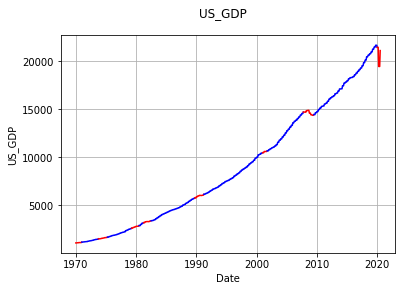

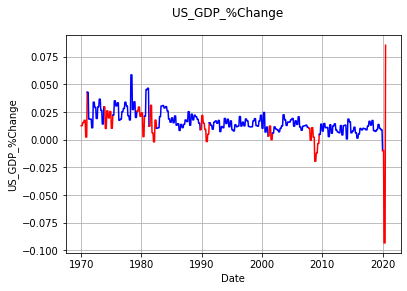

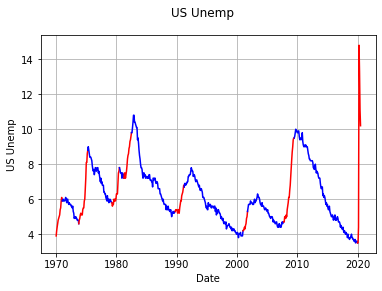

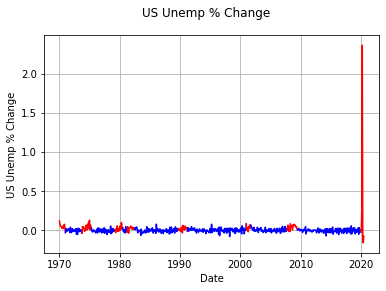

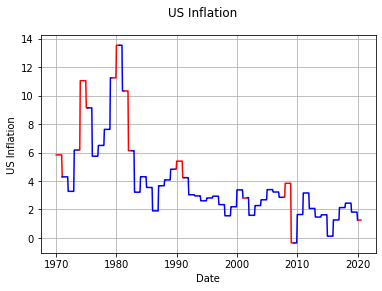

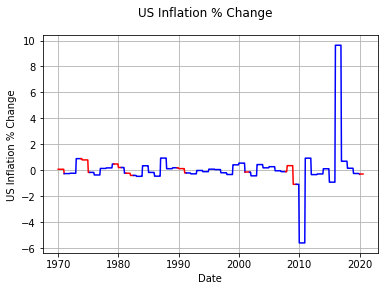

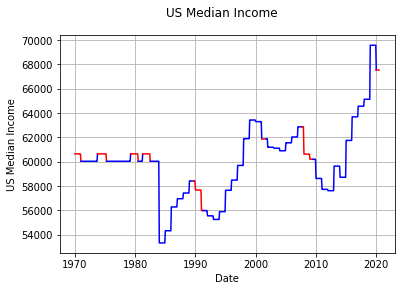

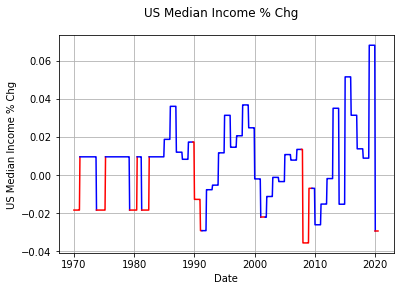

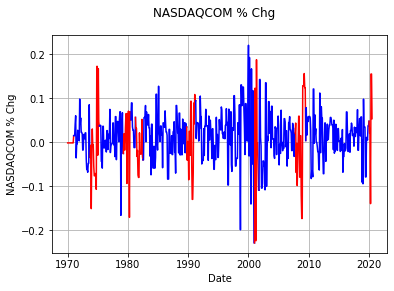

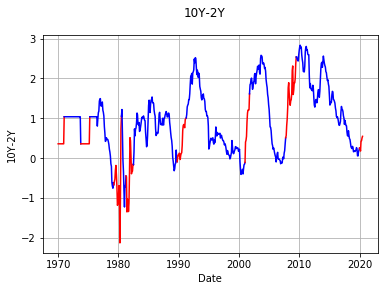

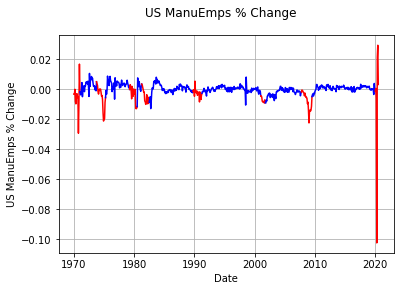

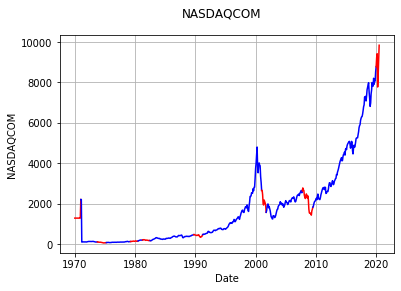

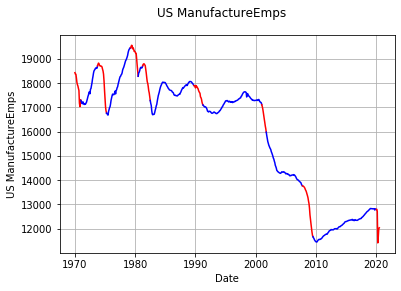

In [27]:
import numpy
from matplotlib import pyplot as plt

for column in df_merged.columns[1:]:
    fig = plt.figure()
    fig.suptitle(column)
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid()
    x=[]
    y=[]
    r=0
    for date, row in df_merged.iterrows():
        x.append(date.to_pydatetime())
        y.append(row[column])
        if r != row['is_recession']:
            if row['is_recession'] == 0:
                r=0
                plt.plot(x, y, 'r')
            else:
                r=1
                plt.plot(x, y, 'b')
            x=[date.to_pydatetime()]
            y=[row[column]]
    plt.show()

Index(['is_recession', 'US_GDP', 'US_GDP_%Change', 'US Unemp',
       'US Unemp % Change', 'US Inflation', 'US Inflation % Change',
       'US Median Income', 'US Median Income % Chg', 'NASDAQCOM % Chg',
       '10Y-2Y', 'US ManuEmps % Change', 'NASDAQCOM', 'US ManufactureEmps'],
      dtype='object')


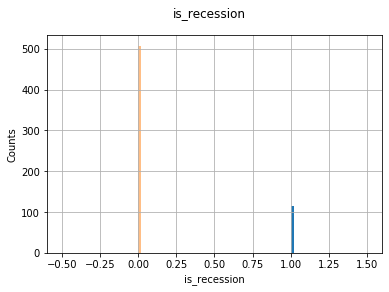

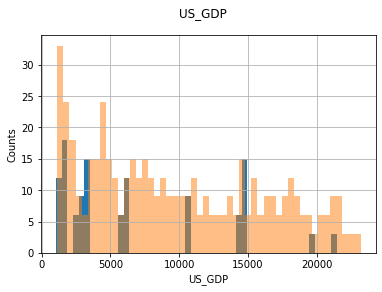

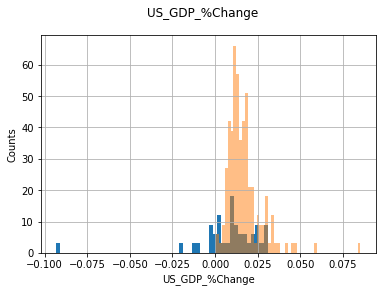

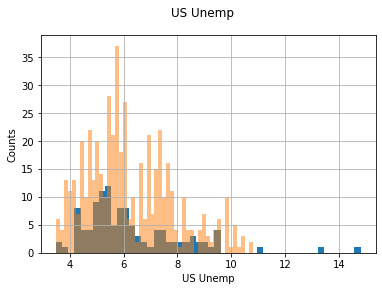

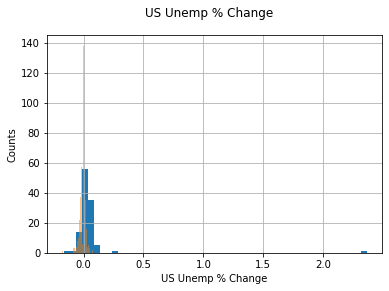

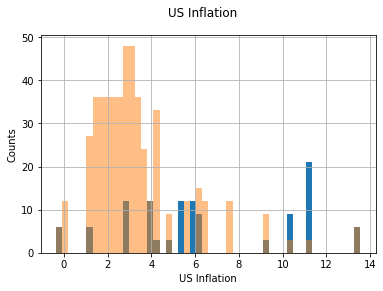

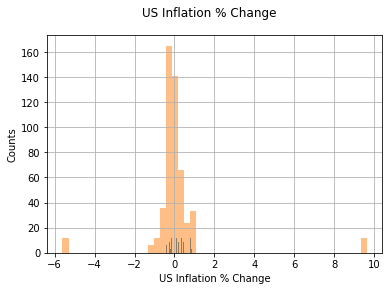

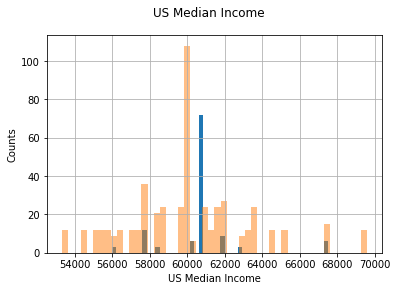

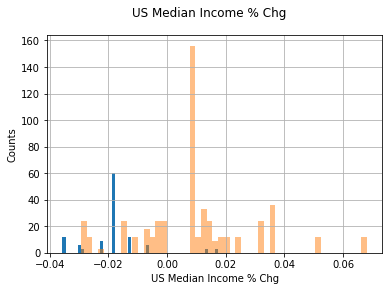

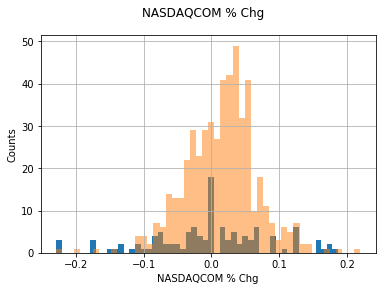

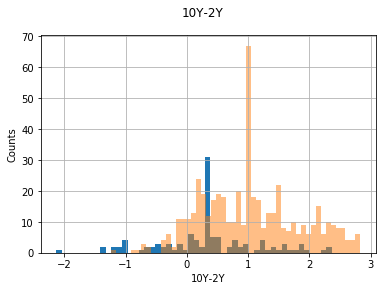

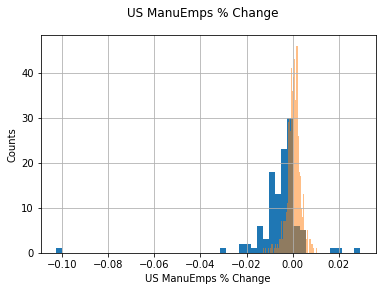

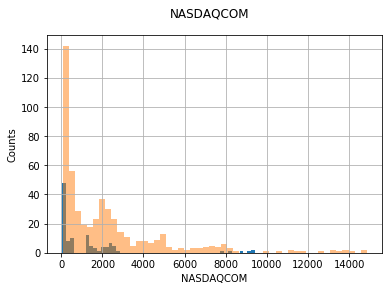

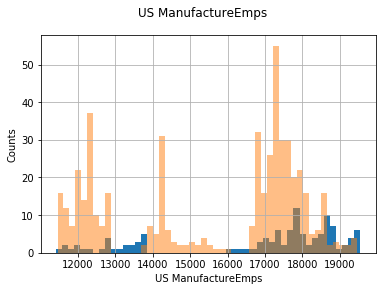

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

print(df_merged.columns)
for column in df_merged.columns:
    fig = plt.figure()
    fig.suptitle(column)
    plt.xlabel(column)
    plt.ylabel("Counts")
    df_merged.query('is_recession==1')[column].hist(bins=50)
    df_merged.query('is_recession==0')[column].hist(bins=50, alpha=0.5)
#     plt.legend(['1', '0'])
    plt.show()

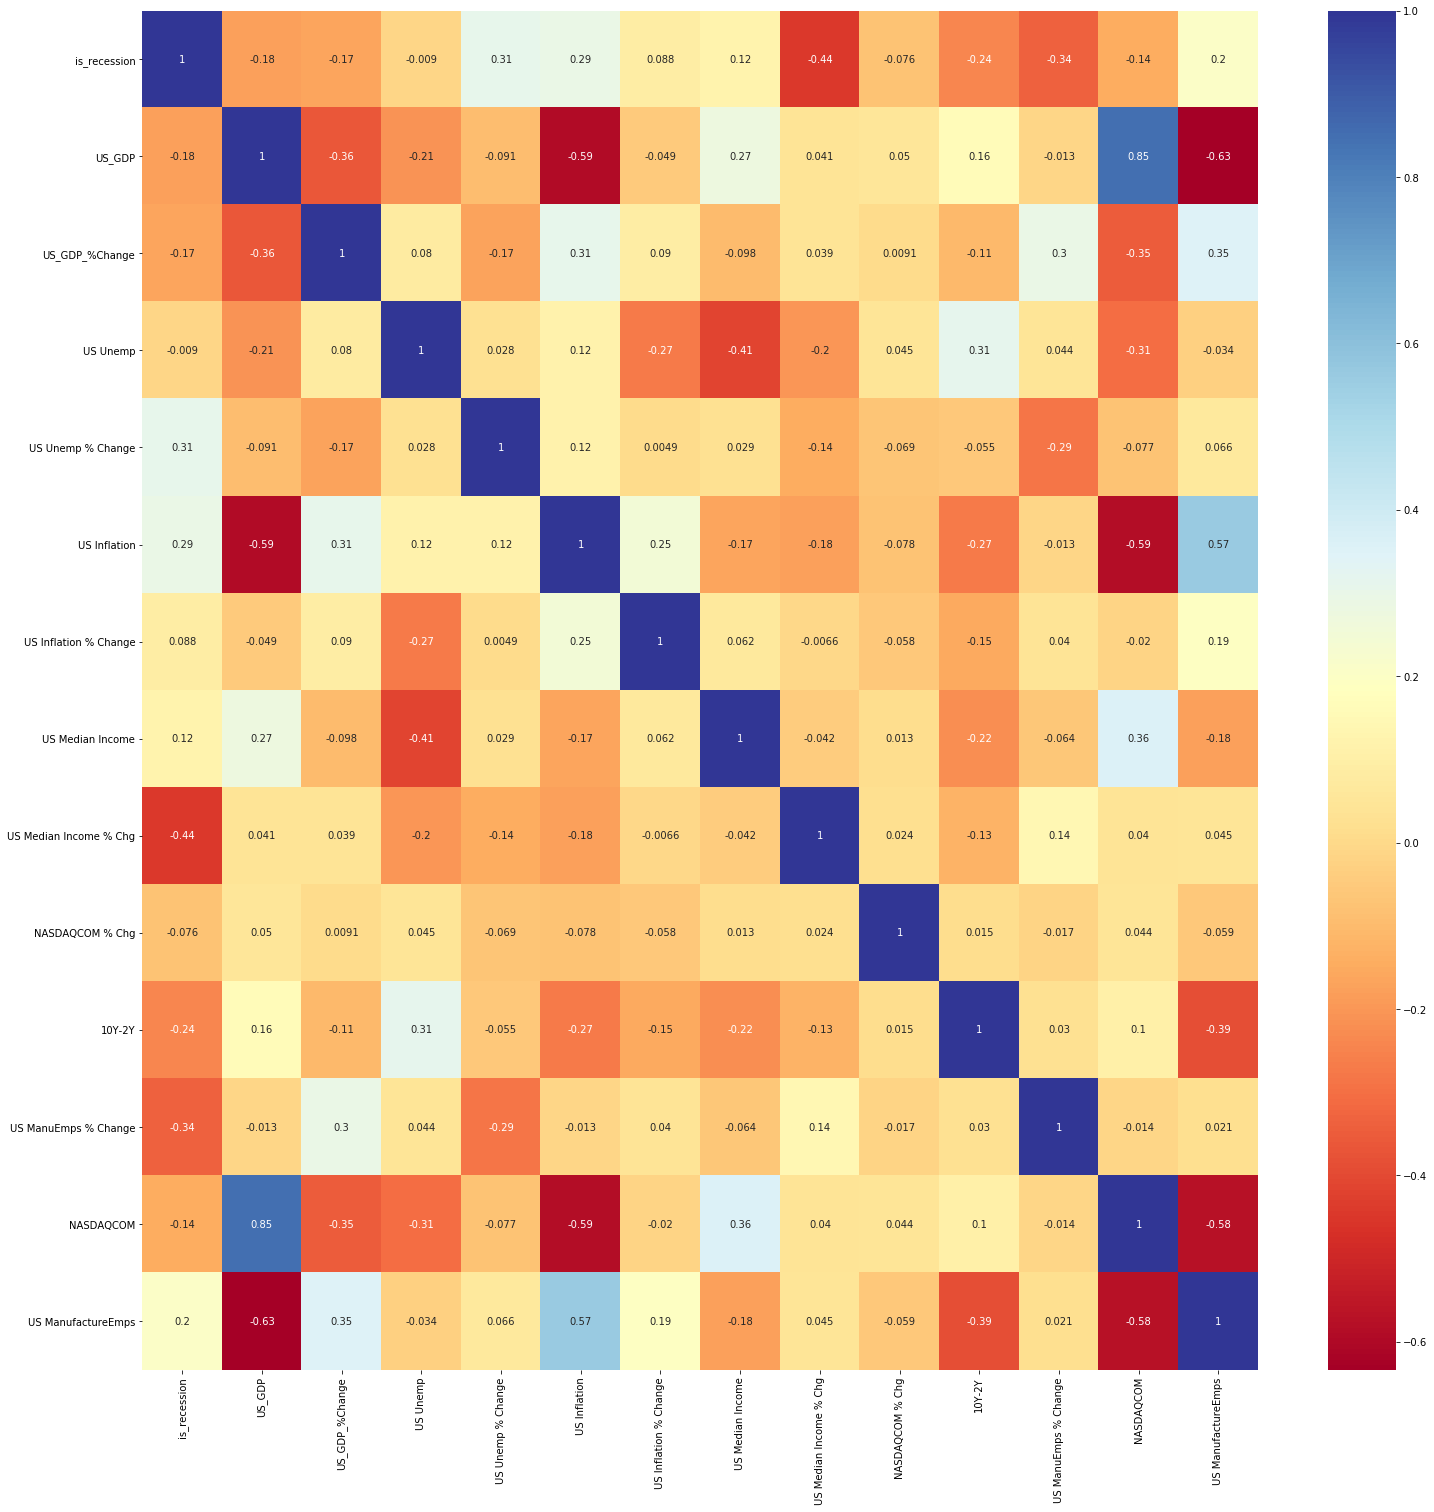

In [29]:
corr = df_merged.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

In [30]:
percent_chg_col = {'US_GDP_%Change', 'US Unemp % Change', 'US Inflation % Change', 
                'NASDAQCOM % Chg', 'US ManuEmps % Change', 'US Median Income % Chg'}
num_col = {'US_GDP', 'US Unemp', 'US Inflation', 'US Median Income', '10Y-2Y', 'US ManufactureEmps', 'NASDAQCOM'}
macro_col = {'US_GDP', 'US Unemp', 'US Inflation', '10Y-2Y', 'US ManufactureEmps', 'US_GDP_%Change', 
             'US Unemp % Change', 'US Inflation % Change', 'US ManuEmps % Change'}
micro_col = {'NASDAQCOM % Chg', 'US Median Income', 'US Median Income % Chg', 'NASDAQCOM'}
target = {'is_recession'}

# Micro: Percent & Raw

In [53]:
micro_pct = df_merged[list(micro_col - num_col)]
micro_raw = df_merged[list(micro_col - percent_chg_col)]
micro_pct.columns, micro_raw.columns
micro_pct.to_csv('microPct.csv')


# Macro: Percent & Raw

In [54]:
macro_pct = df_merged[list(macro_col - num_col)]
macro_raw = df_merged[list(macro_col - percent_chg_col)]
macro_pct.columns, macro_raw.columns
macro_pct.to_csv('macroPct.csv')


# All: Percent & Raw

In [55]:
all_pct = df_merged[list(percent_chg_col)]
all_raw = df_merged[list(num_col)]
all_pct.columns, all_raw.columns
all_pct.to_csv('allPct.csv')


# All: ANOVA Selection

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

def get_k_best(X: pd.DataFrame, y: pd.DataFrame, k: int = 5) -> list:
    """ Takes in a data frame and reports the top K features """
    fit = SelectKBest(score_func=f_classif, k=k).fit(np.array(X), np.array(y).reshape(y.shape[0]))
    values = fit.transform(np.array(X))
    frozen = [frozenset(v) for v in values.T]
    labels = list(label for label, values in X.iteritems() if frozenset(values) in frozen)
    assert len(labels) == k
    return labels

anova_pct_feat = get_k_best(all_pct, df_merged[target])
anova_raw_feat = get_k_best(all_raw, df_merged[target])
anova_pct_feat, anova_raw_feat




(['US ManuEmps % Change',
  'US_GDP_%Change',
  'US Median Income % Chg',
  'NASDAQCOM % Chg',
  'US Unemp % Change'],
 ['10Y-2Y', 'NASDAQCOM', 'US_GDP', 'US ManufactureEmps', 'US Inflation'])

In [57]:
anova_pct = all_pct[anova_pct_feat]
anova_pct
anova_pct.to_csv('anovaPct.csv')

In [58]:
anova_raw = all_raw[anova_raw_feat]
anova_raw



,10Y-2Y,NASDAQCOM,US_GDP,US ManufactureEmps,US Inflation
1970-01-01,0.355958,1286.039078,1051.200,18424.0,5.838255
1970-02-01,0.355958,1286.039078,1051.200,18361.0,5.838255
1970-03-01,0.355958,1286.039078,1051.200,18360.0,5.838255
1970-04-01,0.355958,1286.039078,1067.375,18207.0,5.838255
1970-05-01,0.355958,1286.039078,1067.375,18029.0,5.838255
...,...,...,...,...,...
2021-05-01,1.471818,13900.438095,22740.959,12300.0,1.233584
2021-06-01,1.466000,13517.682500,22740.959,12332.0,1.233584
2021-07-01,1.316364,14097.169091,23187.042,12389.0,1.233584
2021-08-01,1.099048,14639.072857,23187.042,12438.0,1.233584


# All: PCA

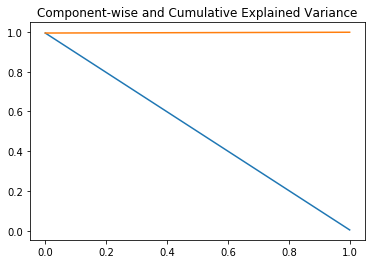

In [62]:
from sklearn.decomposition import PCA

def get_n_components(X: pd.DataFrame, n: int = 5) -> np.ndarray:
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(X.values)
    plt.plot(range(n), pca.explained_variance_ratio_)
    plt.plot(range(n), np.cumsum(pca.explained_variance_ratio_))
    plt.title("Component-wise and Cumulative Explained Variance")
    plt.show()
    return pca_result

pca_pct = get_n_components(all_pct, n = 2)
pca_pct

pd.DataFrame(pca_pct).to_csv('pcaPct.csv')

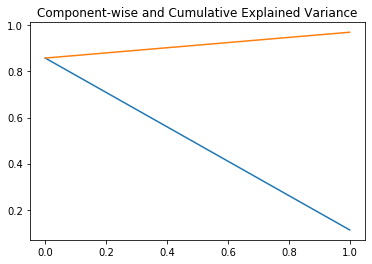

array([[-7878.56388722,  3290.94667805],
       [-7859.47237539,  3275.26437767],
       [-7859.16934449,  3275.01540864],
       ...,
       [18841.80746473,  4608.48812579],
       [18998.80566692,  4755.53577216],
       [19058.97309371,  4816.86483253]])

In [63]:
pca_raw = get_n_components(all_raw, n = 2)
pca_raw



In [64]:
len(pca_raw)

621

# All: Corr Selection

array(['US Median Income % Chg', 'US ManuEmps % Change',
       'US Unemp % Change', 'US_GDP_%Change', 'US Inflation % Change'],
      dtype=object)

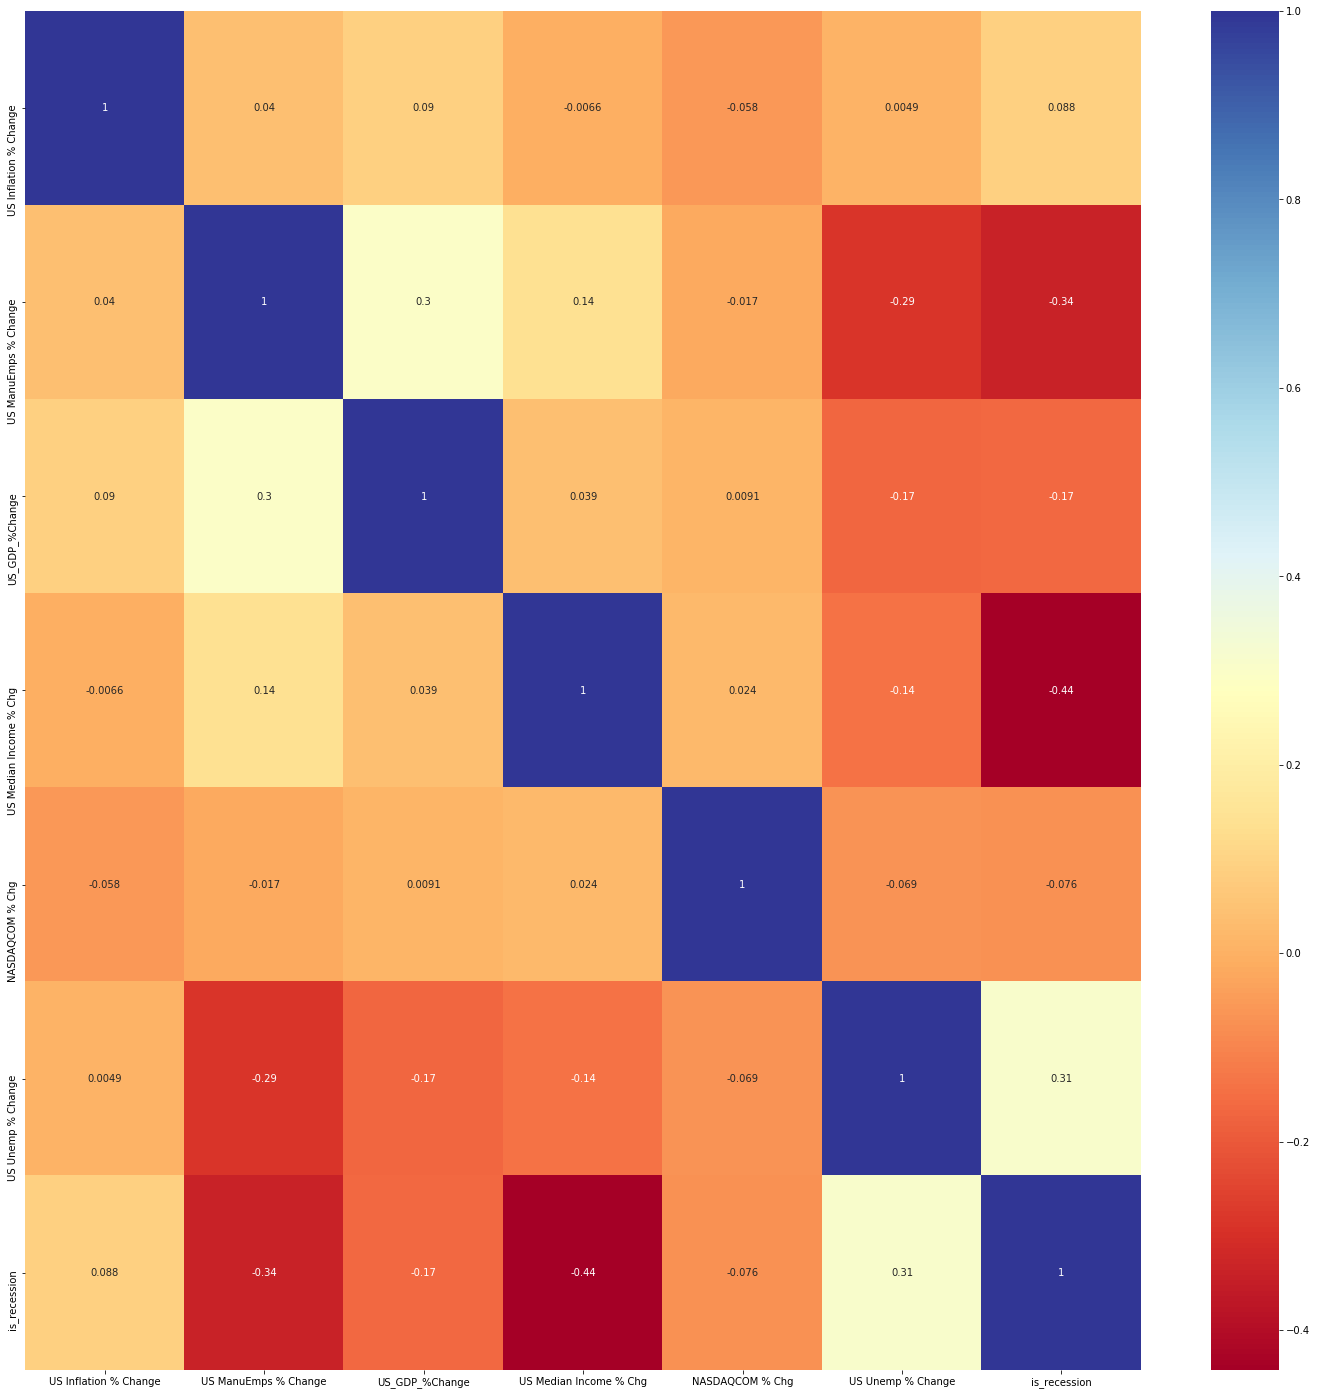

In [65]:
def get_k_corr(df: pd.DataFrame, y: pd.DataFrame, col: str, k: int = 5) -> None:
    """ Plots the correlation matrix and returns the theoretically highest values for the target """
    df = pd.merge(df,df_merged[target],left_index=True,right_index=True,how='inner')
    corr = df.corr(method='kendall')
    ktau_cols = np.array(corr[col].abs().sort_values(ascending=False)[1:51].index)
    plt.figure(figsize=(25,25))
    sns.heatmap(corr, annot=True, cmap="RdYlBu")
    return ktau_cols[:k]

corr_pct_feats = get_k_corr(all_pct, df_merged[target], 'is_recession')
corr_pct_feats

array(['US Inflation', '10Y-2Y', 'US ManufactureEmps', 'US_GDP',
       'NASDAQCOM'], dtype=object)

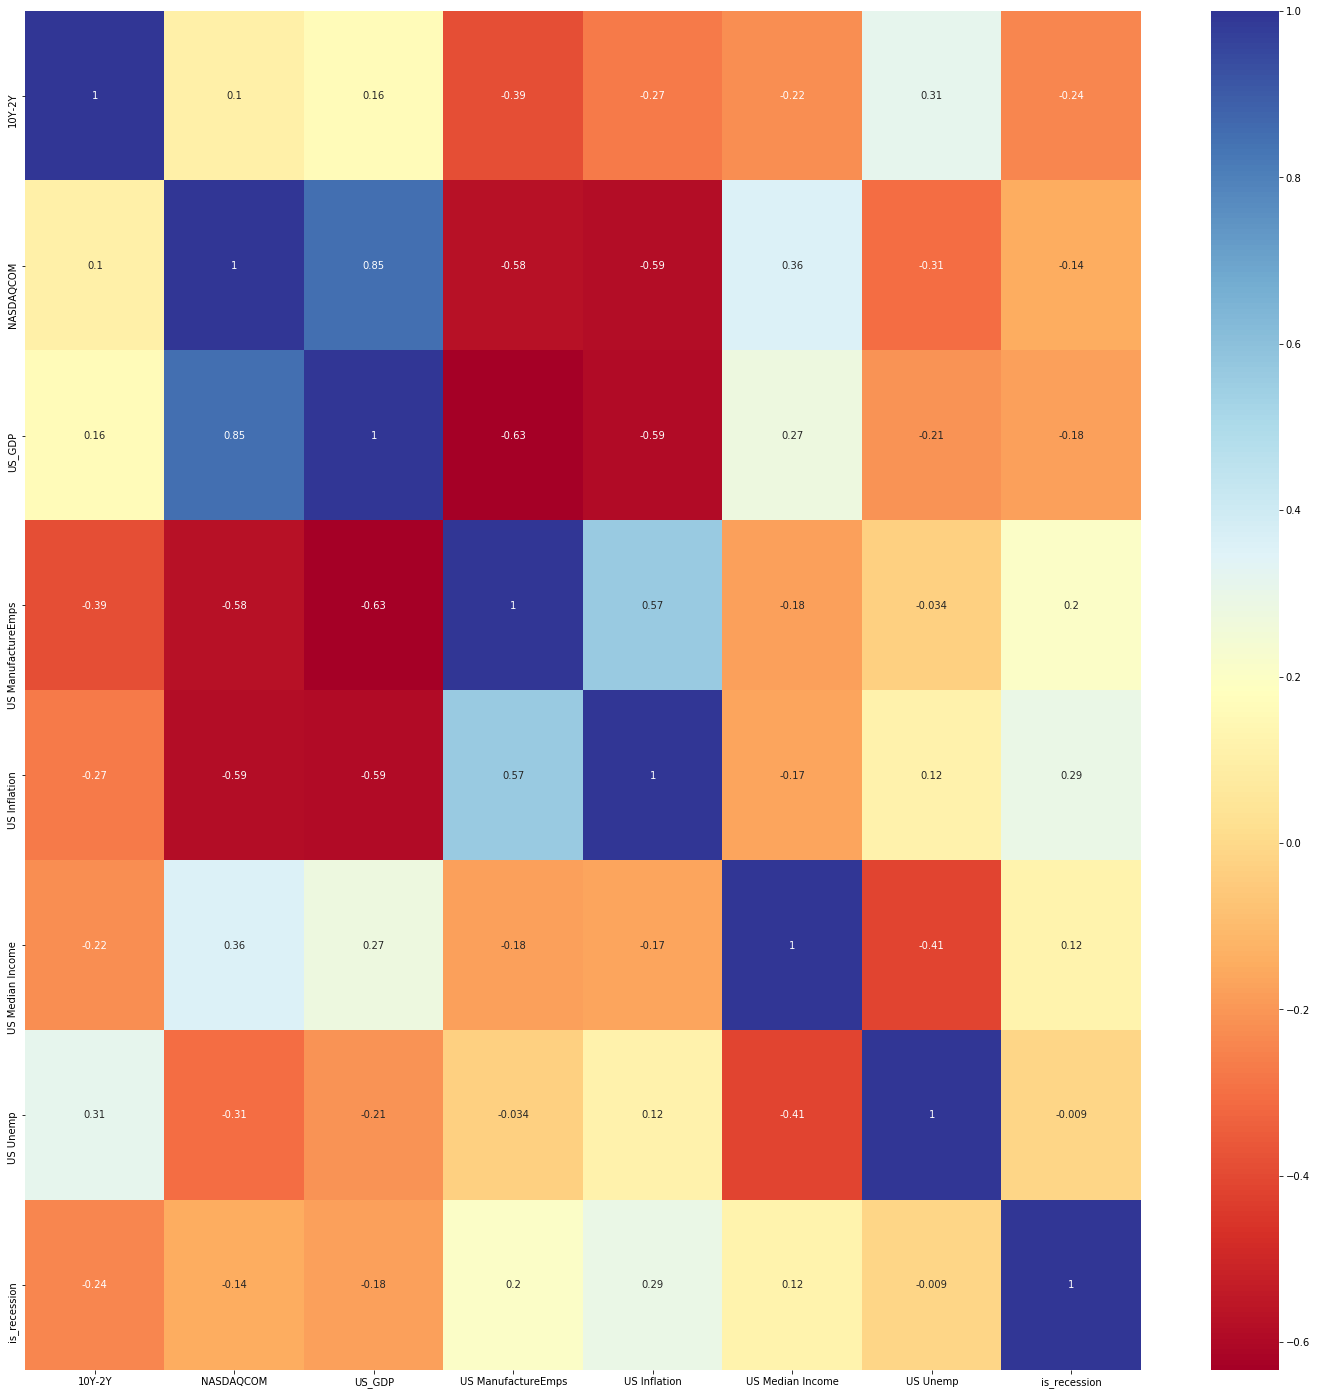

In [66]:
corr_raw_feats = get_k_corr(all_raw, df_merged[target], 'is_recession')
corr_raw_feats



In [67]:
corr_raw = df_merged[corr_raw_feats]
corr_raw


,US Inflation,10Y-2Y,US ManufactureEmps,US_GDP,NASDAQCOM
1970-01-01,5.838255,0.355958,18424.0,1051.200,1286.039078
1970-02-01,5.838255,0.355958,18361.0,1051.200,1286.039078
1970-03-01,5.838255,0.355958,18360.0,1051.200,1286.039078
1970-04-01,5.838255,0.355958,18207.0,1067.375,1286.039078
1970-05-01,5.838255,0.355958,18029.0,1067.375,1286.039078
...,...,...,...,...,...
2021-05-01,1.233584,1.471818,12300.0,22740.959,13900.438095
2021-06-01,1.233584,1.466000,12332.0,22740.959,13517.682500
2021-07-01,1.233584,1.316364,12389.0,23187.042,14097.169091
2021-08-01,1.233584,1.099048,12438.0,23187.042,14639.072857


In [68]:
corr_pct = df_merged[corr_pct_feats]
corr_pct

corr_pct.to_csv('corrPct.csv')

# Everything

In [69]:
everything = df_merged.drop(columns=target)
everything

everything.to_csv('everything.csv')

In [47]:
normalized_dfs = [micro_raw, macro_raw, all_raw, corr_raw, anova_raw]

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
micro_raw = scaler.fit_transform(micro_raw)
macro_raw = scaler.fit_transform(macro_raw)
all_raw = scaler.fit_transform(all_raw)
corr_raw = scaler.fit_transform(corr_raw)
anova_raw = scaler.fit_transform(anova_raw)

pd.DataFrame(corr_raw).to_csv('corrRaw.csv')
pd.DataFrame(pca_raw).to_csv('pcaRaw.csv')
pd.DataFrame(anova_raw).to_csv('anovaRaw.csv')
pd.DataFrame(all_raw).to_csv('allRaw.csv')
pd.DataFrame(macro_raw).to_csv('macroRaw.csv')
pd.DataFrame(micro_raw).to_csv('microRaw.csv')

In [78]:
all_models = [(micro_pct, 'Micro Pct'), (micro_raw, 'Micro Raw'), (macro_pct, 'Macro Pct'), 
              (macro_raw, 'Macro Raw'), (all_pct, 'All Pct'), (all_raw, 'All Raw'), (anova_pct, 'ANOVA Pct'), 
              (anova_raw, 'ANOVA Raw'), (pca_raw, 'PCA Raw'), (pca_pct, 'PCA Pct'), 
              (corr_pct, 'Corr Pct'), (corr_raw, 'Corr Raw')]
len(all_models)

model_scores_data = [["Model", "Data Subset", "Feature Selection Method", "True Positive", "False Positive", "True Negative", "False Negative", "Cross Validation Mean", "Cross Validation STD", "Test Accuracy", "Time"]]

# Models

In [79]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split

## y will be target variable
y = np.array(df_merged[target])
y = y.reshape(y.shape[0])
all_train_test=[]
for model, name in all_models:
    # Splits data into training and testing sets
    all_train_test.append(train_test_split(np.array(model), y, test_size=0.2, random_state=5)+[name])
# Splits the data in 10, such that each fold has the same class distribution of the whole data set, and repeats 3 times.
cross=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

**Logistic Regression Models**

Score for Micro Pct model is 0.8144081632653061 (0.030669542748834742) for cross validated training data.
Score for Micro Pct model is 0.792 for test data.
Accuracy of 24 true recessions: 0.2916666666666667


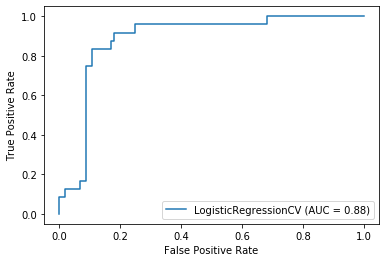

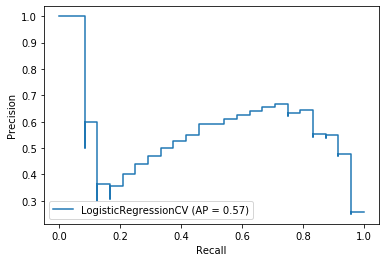

Score for Micro Raw model is 0.8185306122448978 (0.0017996251171467918) for cross validated training data.
Score for Micro Raw model is 0.808 for test data.
Accuracy of 24 true recessions: 0.0


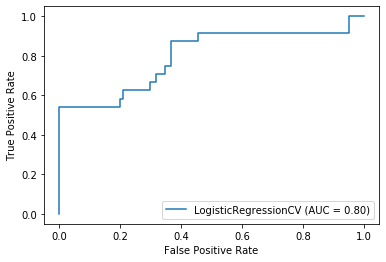

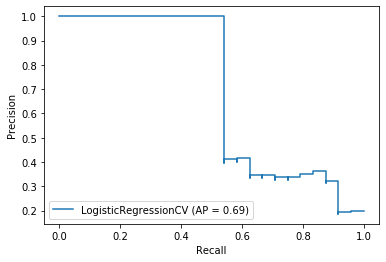

Score for Macro Pct model is 0.8809387755102042 (0.04016710202347934) for cross validated training data.
Score for Macro Pct model is 0.848 for test data.
Accuracy of 24 true recessions: 0.25


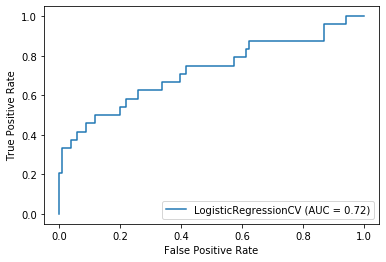

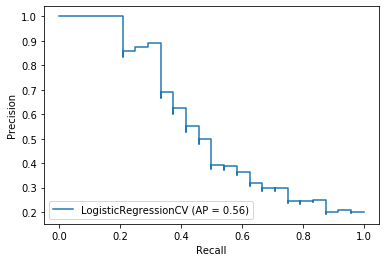

Score for Macro Raw model is 0.8540816326530613 (0.03627340761437159) for cross validated training data.
Score for Macro Raw model is 0.88 for test data.
Accuracy of 24 true recessions: 0.5


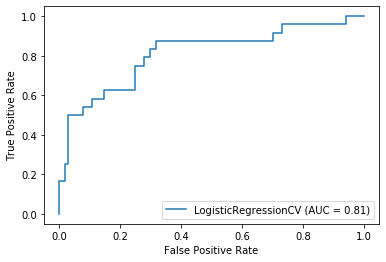

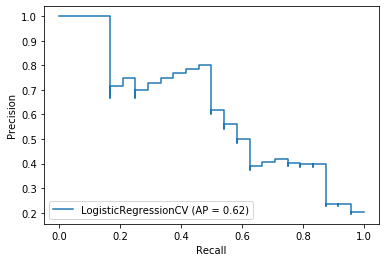

Score for All Pct model is 0.9126122448979592 (0.03316827382378011) for cross validated training data.
Score for All Pct model is 0.888 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


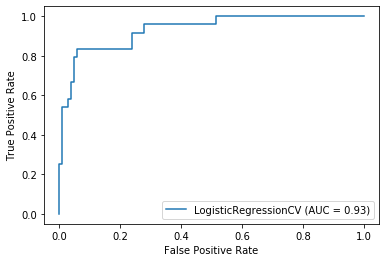

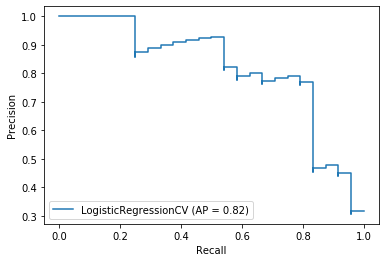

Score for All Raw model is 0.8554149659863945 (0.034972817565061536) for cross validated training data.
Score for All Raw model is 0.88 for test data.
Accuracy of 24 true recessions: 0.5


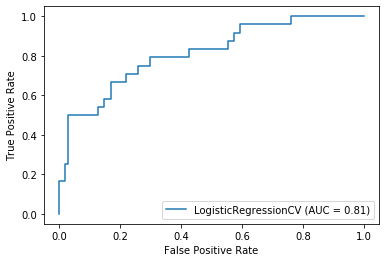

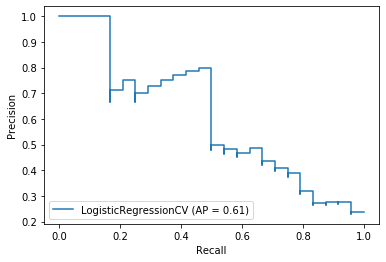

Score for ANOVA Pct model is 0.8977959183673467 (0.03309792201994017) for cross validated training data.
Score for ANOVA Pct model is 0.896 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


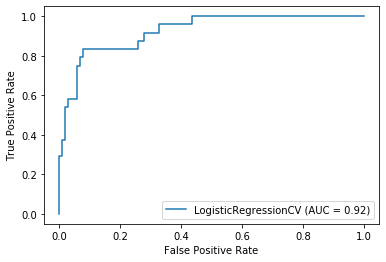

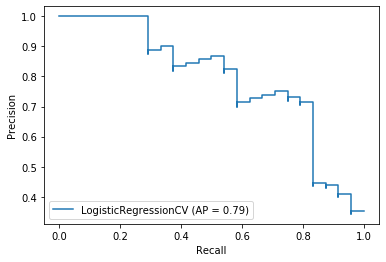

Score for ANOVA Raw model is 0.8540952380952381 (0.03513947273807963) for cross validated training data.
Score for ANOVA Raw model is 0.864 for test data.
Accuracy of 24 true recessions: 0.4583333333333333


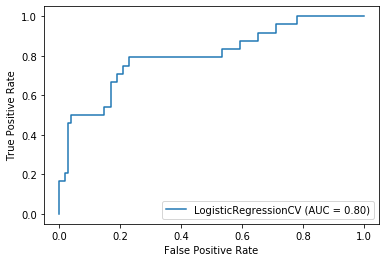

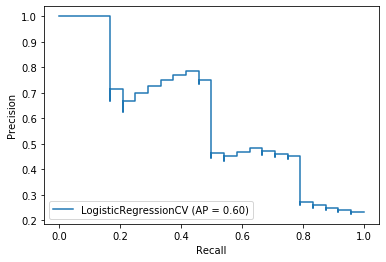

Score for PCA Raw model is 0.8185306122448978 (0.0017996251171467918) for cross validated training data.
Score for PCA Raw model is 0.808 for test data.
Accuracy of 24 true recessions: 0.0


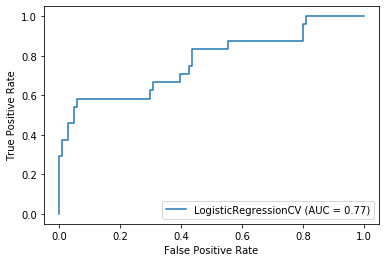

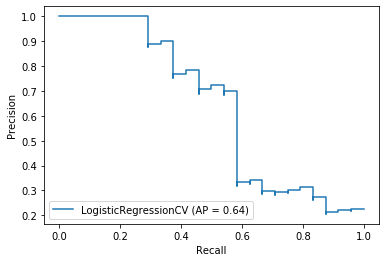

Score for PCA Pct model is 0.8674965986394556 (0.02700249798623108) for cross validated training data.
Score for PCA Pct model is 0.848 for test data.
Accuracy of 24 true recessions: 0.25


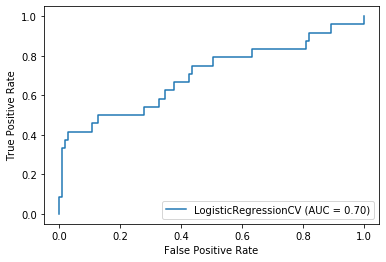

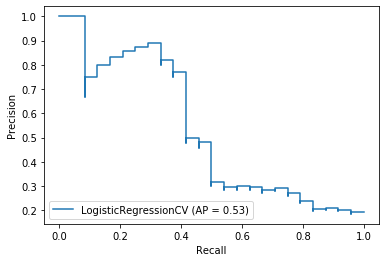

Score for Corr Pct model is 0.9119183673469387 (0.03606161909935815) for cross validated training data.
Score for Corr Pct model is 0.904 for test data.
Accuracy of 24 true recessions: 0.5416666666666666


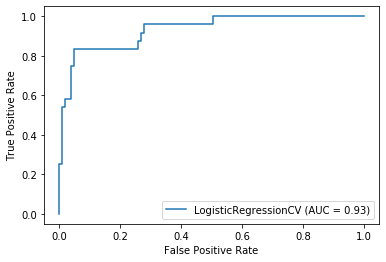

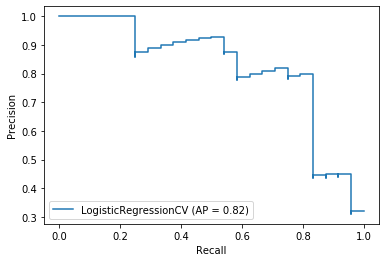

Score for Corr Raw model is 0.8540952380952381 (0.03513947273807963) for cross validated training data.
Score for Corr Raw model is 0.864 for test data.
Accuracy of 24 true recessions: 0.4583333333333333


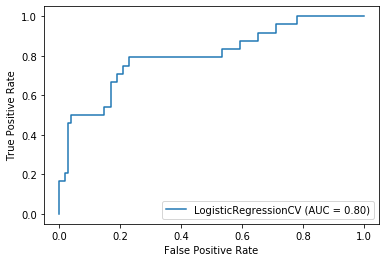

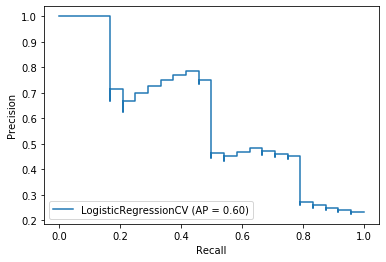

In [80]:
## Example PCA Usage
#### Notice that there is no need to convert it to a ndarray since it is already in that form
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
import time

# No Hyperparameters to tune here
def logisticModels(X_train, X_test, y_train, y_test, name):
    start = time.time()
    lr = LogisticRegressionCV(max_iter=1000, fit_intercept=True, random_state=0)
    accuracy=cross_val_score(lr, X_train, y_train, scoring="accuracy", cv=cross)
    lr.fit(X_train, y_train)
    print(f'Score for {name} model is {np.mean(accuracy)} ({np.std(accuracy)}) for cross validated training data.')
    print(f'Score for {name} model is {lr.score(X_test, y_test)} for test data.')
    cm = confusion_matrix(y_test, lr.predict(X_test))
    correct = cm[1][1]
    total = correct + cm[1][0]
    print(f'Accuracy of {total} true recessions: {correct/total}')
    plot_roc_curve(lr, X_test, y_test)
    plot_precision_recall_curve(lr, X_test, y_test)
    plt.show()
    data_sub, fsm = name.split()
    model_scores_data.append(["Logistic Regression", data_sub, fsm, cm[1][1], cm[0][1], cm[0][0], cm[1][0], np.mean(accuracy), np.std(accuracy), correct/total, time.time()-start])

for i in all_train_test:
    logisticModels(*i)

**Random Forest Models**

Score for Micro Pct model is 0.9152108843537415 (0.029647366773638946) for cross validated training data.
Score for Micro Pct model is 0.968 for test data.
Accuracy of 24 true recessions predicted: 0.8333333333333334


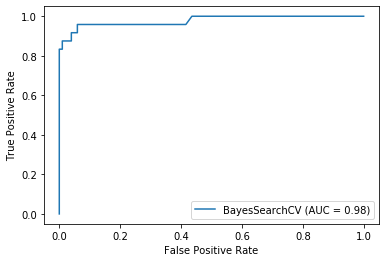

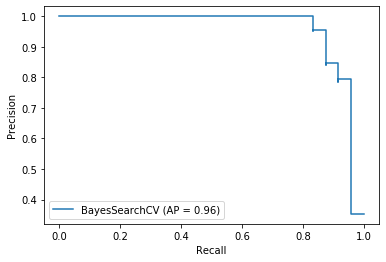

Score for Micro Raw model is 0.9374285714285714 (0.02252137984951748) for cross validated training data.
Score for Micro Raw model is 0.928 for test data.
Accuracy of 24 true recessions predicted: 0.75


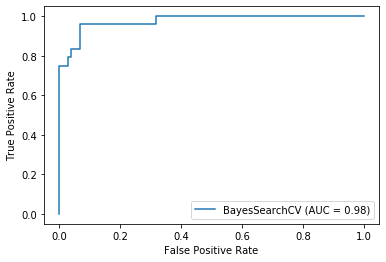

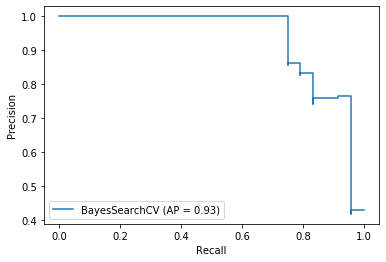

Score for Macro Pct model is 0.8851156462585034 (0.03642129858737707) for cross validated training data.
Score for Macro Pct model is 0.888 for test data.
Accuracy of 24 true recessions predicted: 0.4583333333333333


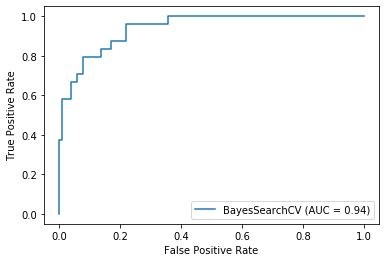

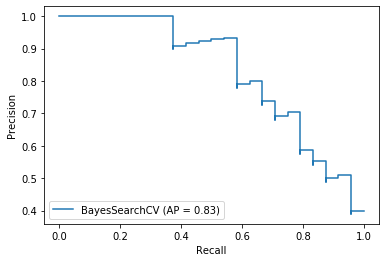

Score for Macro Raw model is 0.9306530612244899 (0.031013667366424136) for cross validated training data.
Score for Macro Raw model is 0.904 for test data.
Accuracy of 24 true recessions predicted: 0.75


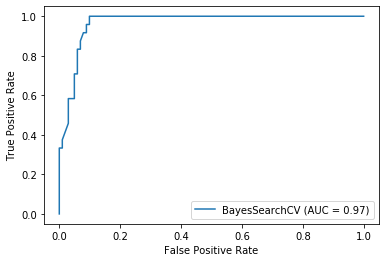

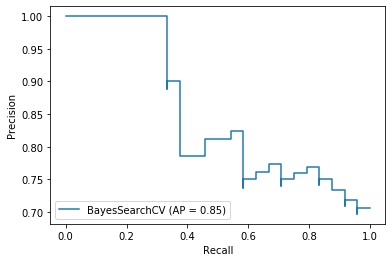

Score for All Pct model is 0.9555510204081632 (0.02645270612867269) for cross validated training data.
Score for All Pct model is 0.976 for test data.
Accuracy of 24 true recessions predicted: 0.875


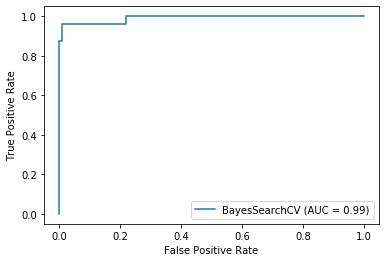

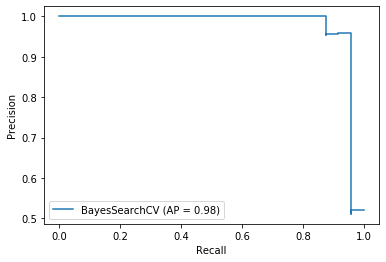

Score for All Raw model is 0.9434693877551019 (0.027518549774689583) for cross validated training data.
Score for All Raw model is 0.952 for test data.
Accuracy of 24 true recessions predicted: 0.7916666666666666


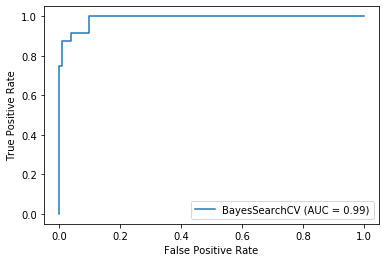

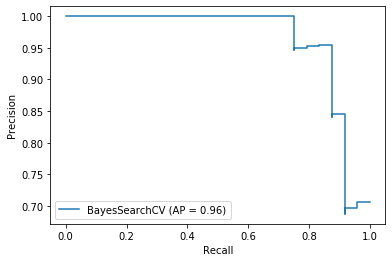

Score for ANOVA Pct model is 0.9468299319727892 (0.028468606691225702) for cross validated training data.
Score for ANOVA Pct model is 0.96 for test data.
Accuracy of 24 true recessions predicted: 0.7916666666666666


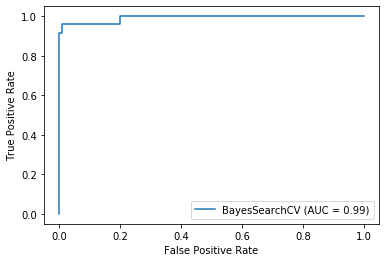

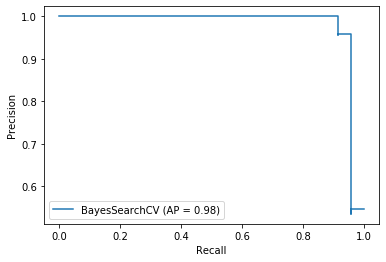

Score for ANOVA Raw model is 0.9273197278911564 (0.031245146043498637) for cross validated training data.
Score for ANOVA Raw model is 0.92 for test data.
Accuracy of 24 true recessions predicted: 0.75


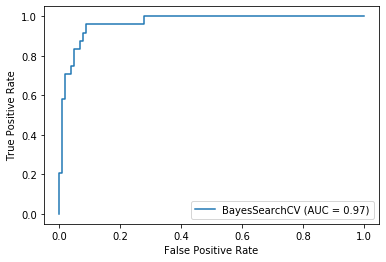

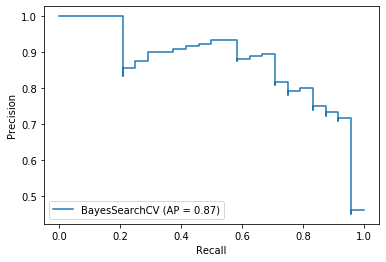

Score for PCA Raw model is 0.9341768707482991 (0.03193564494593498) for cross validated training data.
Score for PCA Raw model is 0.96 for test data.
Accuracy of 24 true recessions predicted: 0.8333333333333334


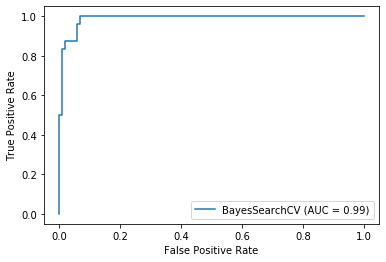

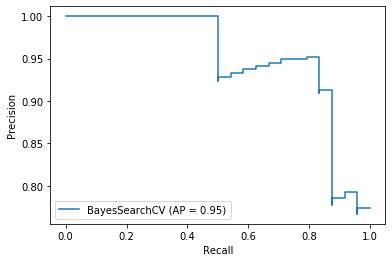

Score for PCA Pct model is 0.8587755102040815 (0.03936000573383452) for cross validated training data.
Score for PCA Pct model is 0.864 for test data.
Accuracy of 24 true recessions predicted: 0.375


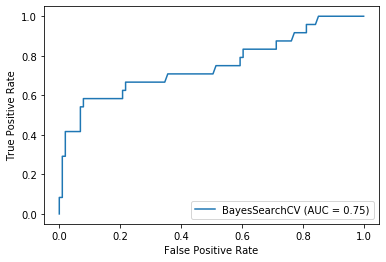

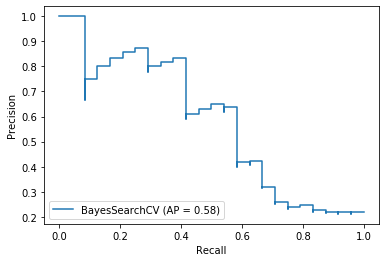

Score for Corr Pct model is 0.9582721088435374 (0.020948674466753667) for cross validated training data.
Score for Corr Pct model is 0.968 for test data.
Accuracy of 24 true recessions predicted: 0.8333333333333334


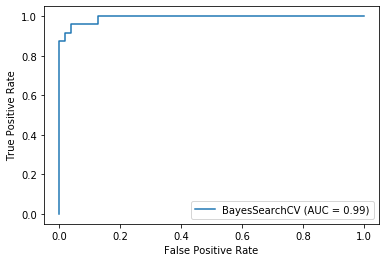

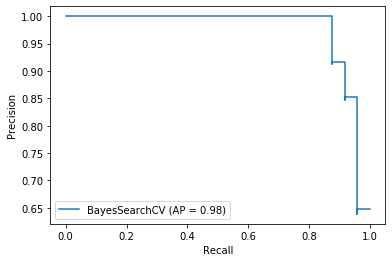

Score for Corr Raw model is 0.9293469387755101 (0.0266919947743516) for cross validated training data.
Score for Corr Raw model is 0.936 for test data.
Accuracy of 24 true recessions predicted: 0.7916666666666666


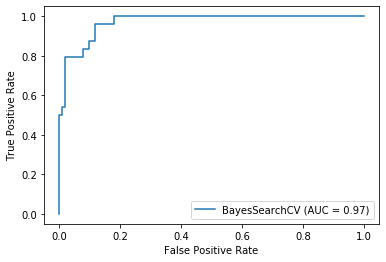

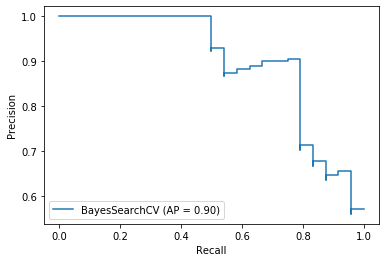

In [81]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV # pip3 install scikit-optimize
from skopt.space import Integer
from random import randint
import time

def randomForestModels(X_train, X_test, y_train, y_test, name):
    start = time.time()
    opt=BayesSearchCV(
        RandomForestClassifier(),
        {
            'n_estimators': Integer(5, 100), 
            'min_samples_leaf': Integer(1, 10), 
            'min_samples_split': Integer(2, 10)
        },
        n_iter=7,
        random_state=1
    )
    accuracy=cross_val_score(opt, X_train, y_train, scoring="accuracy", cv=cross)
    opt.fit(X_train, y_train)
    print(f'Score for {name} model is {np.mean(accuracy)} ({np.std(accuracy)}) for cross validated training data.')
    print(f'Score for {name} model is {opt.score(X_test, y_test)} for test data.')
    cm = confusion_matrix(y_test, opt.predict(X_test))
    correct = cm[1][1]
    total = correct + cm[1][0]
    print(f'Accuracy of {total} true recessions predicted: {correct/total}')
    plot_roc_curve(opt, X_test, y_test)
    plot_precision_recall_curve(opt, X_test, y_test)
    plt.show()
    data_sub, fsm = name.split()
    model_scores_data.append(["Random Forest Classifier", data_sub, fsm, cm[1][1], cm[0][1], cm[0][0], cm[1][0], np.mean(accuracy), np.std(accuracy), correct/total, time.time()-start])

for i in all_train_test:
    randomForestModels(*i)

# Reporting

In [82]:
model_scores=pd.DataFrame(model_scores_data[1:], columns=model_scores_data[0])
model_scores.sort_values(by=[model_scores_data[0][-1]], ascending=False)

,Model,Data Subset,Feature Selection Method,True Positive,False Positive,True Negative,False Negative,Cross Validation Mean,Cross Validation STD,Test Accuracy,Time
19,Random Forest Classifier,ANOVA,Raw,18,4,97,6,0.927320,0.031245,0.750000,38.552371
14,Random Forest Classifier,Macro,Pct,11,1,100,13,0.885116,0.036421,0.458333,38.493693
23,Random Forest Classifier,Corr,Raw,19,3,98,5,0.929347,0.026692,0.791667,37.812648
17,Random Forest Classifier,All,Raw,19,1,100,5,0.943469,0.027519,0.791667,37.144516
16,Random Forest Classifier,All,Pct,21,0,101,3,0.955551,0.026453,0.875000,36.894684
15,Random Forest Classifier,Macro,Raw,18,6,95,6,0.930653,0.031014,0.750000,36.566679
22,Random Forest Classifier,Corr,Pct,20,0,101,4,0.958272,0.020949,0.833333,36.525716
18,Random Forest Classifier,ANOVA,Pct,19,0,101,5,0.946830,0.028469,0.791667,36.264540
20,Random Forest Classifier,PCA,Raw,20,1,100,4,0.934177,0.031936,0.833333,35.908447
21,Random Forest Classifier,PCA,Pct,9,2,99,15,0.858776,0.039360,0.375000,35.129921
